# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sp
import json
from pprint import pprint
import matplotlib.colors as mcolors

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
cities

['kalmunai',
 'rikitea',
 'santa maria',
 'butembo',
 'cidreira',
 'hermanus',
 'phek',
 'sladkovo',
 'colares',
 'nemuro',
 'busselton',
 'valparaiso',
 'zunyi',
 'zolotinka',
 'russell',
 'luderitz',
 'mataura',
 'vao',
 'buqayq',
 'guerrero negro',
 'yellowknife',
 'nikolskoye',
 'carnarvon',
 'hambantota',
 'saint-philippe',
 'sinnamary',
 'nome',
 'kapaa',
 'tautira',
 'souillac',
 'barrow',
 'severo-kurilsk',
 'thompson',
 'mindelo',
 'leh',
 'bluff',
 'boa vista',
 'kupang',
 'hualmay',
 'vyborg',
 'half moon bay',
 'saquarema',
 'tuatapere',
 'beni',
 'avarua',
 'albany',
 'bijie',
 'kamenskoye',
 'puerto ayora',
 'manokwari',
 'kodiak',
 'hobart',
 'marzuq',
 'mahebourg',
 'punta arenas',
 'yuzhno-yeniseyskiy',
 'basco',
 'vaini',
 'sao filipe',
 'cape town',
 'belushya guba',
 'anloga',
 'naron',
 'taurisano',
 'axim',
 'hasaki',
 'itoman',
 'katsuura',
 'upernavik',
 'hithadhoo',
 'khatanga',
 'salalah',
 'beaufort',
 'kruisfontein',
 'ahipara',
 'sitka',
 'atuona',
 'berlev

In [5]:
len(cities)

620

In [7]:
cities

['kalmunai',
 'rikitea',
 'santa maria',
 'butembo',
 'cidreira',
 'hermanus',
 'phek',
 'sladkovo',
 'colares',
 'nemuro',
 'busselton',
 'valparaiso',
 'zunyi',
 'zolotinka',
 'russell',
 'luderitz',
 'mataura',
 'vao',
 'buqayq',
 'guerrero negro',
 'yellowknife',
 'nikolskoye',
 'carnarvon',
 'hambantota',
 'saint-philippe',
 'sinnamary',
 'nome',
 'kapaa',
 'tautira',
 'souillac',
 'barrow',
 'severo-kurilsk',
 'thompson',
 'mindelo',
 'leh',
 'bluff',
 'boa vista',
 'kupang',
 'hualmay',
 'vyborg',
 'half moon bay',
 'saquarema',
 'tuatapere',
 'beni',
 'avarua',
 'albany',
 'bijie',
 'kamenskoye',
 'puerto ayora',
 'manokwari',
 'kodiak',
 'hobart',
 'marzuq',
 'mahebourg',
 'punta arenas',
 'yuzhno-yeniseyskiy',
 'basco',
 'vaini',
 'sao filipe',
 'cape town',
 'belushya guba',
 'anloga',
 'naron',
 'taurisano',
 'axim',
 'hasaki',
 'itoman',
 'katsuura',
 'upernavik',
 'hithadhoo',
 'khatanga',
 'salalah',
 'beaufort',
 'kruisfontein',
 'ahipara',
 'sitka',
 'atuona',
 'berlev

In [8]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url='https://api.openweathermap.org/data/2.5/weather?'
api_key=f'&appid={weather_api_key}'
units= '&units=imperial'
citys=[]
lat=[]
lon=[]
maxtemp=[]
hum=[]
cloud=[]
wspeed=[]
country=[]
date=[]
city_cnt=0
for city in cities:#replace for short print test in range: cities[1:5]
    city_cnt=city_cnt+1
    city_ref=f'q={city}'
    response = requests.get(url+city_ref+units+api_key).json()
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        citys.append(response['name'])
        maxtemp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print("No City Found Skipping --------------------")
    print(f"Processing Record:{city_cnt}  of Set:{1} |{city}")
# print (citys)    
# print (lat)
# print (lon)
# print (maxtemp)
# print (hum)

Processing Record:1  of Set:1 |kalmunai
Processing Record:2  of Set:1 |rikitea
Processing Record:3  of Set:1 |santa maria
Processing Record:4  of Set:1 |butembo
Processing Record:5  of Set:1 |cidreira
Processing Record:6  of Set:1 |hermanus
Processing Record:7  of Set:1 |phek
Processing Record:8  of Set:1 |sladkovo
Processing Record:9  of Set:1 |colares
Processing Record:10  of Set:1 |nemuro
Processing Record:11  of Set:1 |busselton
Processing Record:12  of Set:1 |valparaiso
Processing Record:13  of Set:1 |zunyi
No City Found Skipping --------------------
Processing Record:14  of Set:1 |zolotinka
Processing Record:15  of Set:1 |russell
Processing Record:16  of Set:1 |luderitz
Processing Record:17  of Set:1 |mataura
Processing Record:18  of Set:1 |vao
No City Found Skipping --------------------
Processing Record:19  of Set:1 |buqayq
Processing Record:20  of Set:1 |guerrero negro
Processing Record:21  of Set:1 |yellowknife
Processing Record:22  of Set:1 |nikolskoye
Processing Record:23  

Processing Record:177  of Set:1 |ghanzi
Processing Record:178  of Set:1 |taltal
Processing Record:179  of Set:1 |cayenne
Processing Record:180  of Set:1 |tahoua
Processing Record:181  of Set:1 |bilma
Processing Record:182  of Set:1 |fare
Processing Record:183  of Set:1 |yatou
Processing Record:184  of Set:1 |georgetown
Processing Record:185  of Set:1 |hilo
No City Found Skipping --------------------
Processing Record:186  of Set:1 |mrirt
Processing Record:187  of Set:1 |beloha
Processing Record:188  of Set:1 |saldanha
Processing Record:189  of Set:1 |parkhill
Processing Record:190  of Set:1 |chuy
Processing Record:191  of Set:1 |santiago del estero
No City Found Skipping --------------------
Processing Record:192  of Set:1 |samusu
Processing Record:193  of Set:1 |kaitangata
Processing Record:194  of Set:1 |termoli
Processing Record:195  of Set:1 |hermitage
No City Found Skipping --------------------
Processing Record:196  of Set:1 |karakendzha
Processing Record:197  of Set:1 |nanortali

No City Found Skipping --------------------
Processing Record:349  of Set:1 |canitas
Processing Record:350  of Set:1 |hotaka
Processing Record:351  of Set:1 |kaseda
Processing Record:352  of Set:1 |chapais
Processing Record:353  of Set:1 |akdepe
Processing Record:354  of Set:1 |batamshinskiy
Processing Record:355  of Set:1 |vila velha
Processing Record:356  of Set:1 |haines junction
Processing Record:357  of Set:1 |pacific grove
Processing Record:358  of Set:1 |kiruna
Processing Record:359  of Set:1 |batemans bay
Processing Record:360  of Set:1 |kloulklubed
Processing Record:361  of Set:1 |ponta do sol
Processing Record:362  of Set:1 |altamirano
Processing Record:363  of Set:1 |airai
Processing Record:364  of Set:1 |vila franca do campo
Processing Record:365  of Set:1 |tongchuan
Processing Record:366  of Set:1 |narsaq
Processing Record:367  of Set:1 |qandala
Processing Record:368  of Set:1 |ribas do rio pardo
Processing Record:369  of Set:1 |shiyan
Processing Record:370  of Set:1 |broo

Processing Record:530  of Set:1 |laja
Processing Record:531  of Set:1 |ibotirama
Processing Record:532  of Set:1 |nanga eboko
Processing Record:533  of Set:1 |omsukchan
Processing Record:534  of Set:1 |sao gabriel da cachoeira
No City Found Skipping --------------------
Processing Record:535  of Set:1 |gorno-chuyskiy
Processing Record:536  of Set:1 |port lincoln
Processing Record:537  of Set:1 |coquimbo
Processing Record:538  of Set:1 |leninskoye
Processing Record:539  of Set:1 |mekhe
Processing Record:540  of Set:1 |swan river
Processing Record:541  of Set:1 |caucaia
Processing Record:542  of Set:1 |kuala pilah
Processing Record:543  of Set:1 |tondano
Processing Record:544  of Set:1 |pisco
Processing Record:545  of Set:1 |manavgat
Processing Record:546  of Set:1 |puerto quijarro
Processing Record:547  of Set:1 |chumphon
Processing Record:548  of Set:1 |awbari
Processing Record:549  of Set:1 |mecca
Processing Record:550  of Set:1 |aksarka
Processing Record:551  of Set:1 |beyneu
Process

In [10]:
len(citys)

548

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# lat=lat('${:,.2f}'.format)
weather_dic={
    'City':citys,
    'Lat':lat,
    'Lng':lon,
    'Max Temp':maxtemp,
    'Humidity':hum,
    'Cloudiness':cloud,
    'Wind Speed':wspeed,
    'Country':country,
    'Date':date
}

weather_data=pd.DataFrame(weather_dic)

weather_data['Lat'] = weather_data['Lat'].map('{:,.2f}'.format).astype(float)
weather_data['Lng'] = weather_data['Lng'].map('{:,.2f}'.format).astype(float)
weather_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kalmunai,7.42,81.82,78.40,85,36,8.57,LK,1611975828
1,Rikitea,-23.12,-134.97,80.46,70,38,9.26,PF,1611975828
2,Santa Maria,-29.68,-53.81,75.20,83,0,9.22,BR,1611975567
3,Butembo,0.15,29.28,59.54,69,12,2.66,CD,1611975829
4,Cidreira,-30.18,-50.21,75.16,89,39,4.92,BR,1611975829
...,...,...,...,...,...,...,...,...,...
543,Udimskiy,61.14,45.91,17.91,97,100,6.04,RU,1611976037
544,Itacurubí del Rosario,-24.50,-56.68,73.85,96,53,4.27,PY,1611976037
545,Charters Towers,-20.10,146.27,88.97,31,76,9.89,AU,1611976020
546,Três Lagoas,-20.75,-51.68,71.87,92,84,4.29,BR,1611976038


In [13]:
weather_data.to_csv(output_data_file)

In [14]:
weather_stats=pd.DataFrame(weather_dic)

In [15]:
# waether_stats=pd.DataFrame(weather_dic)
weather_stats[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,20.195484,18.331798,47.601825,74.961679,51.875912,8.045566,1.611976e+09
std,33.072610,91.054573,33.221805,17.909696,40.048589,5.772896,9.130119e+01
min,-54.800000,-179.166700,-43.280000,18.000000,0.000000,0.040000,1.611976e+09
25%,-7.129550,-63.314225,26.600000,66.000000,3.750000,3.440000,1.611976e+09
50%,25.083350,18.828850,57.990000,78.000000,52.000000,6.420000,1.611976e+09
75%,46.632600,100.799400,74.910000,88.000000,90.250000,11.097500,1.611976e+09
max,78.218600,178.416700,105.800000,100.000000,100.000000,27.630000,1.611976e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#see how many cities are at 100% humidity
hum_drop=weather_data['Humidity']==100
# df.drop(index='cow', columns='small')
hum_drop_list=list(hum_drop.index)#.value_counts()


In [18]:
hum_drop.value_counts()

False    530
True      18
Name: Humidity, dtype: int64

In [19]:
hum_droplist=weather_data[weather_data['Humidity']==100]
hum_droplist.count()

City          18
Lat           18
Lng           18
Max Temp      18
Humidity      18
Cloudiness    18
Wind Speed    18
Country       18
Date          18
dtype: int64

In [20]:
hum_drop_index=list(hum_droplist.index)

In [23]:
hum_drop_index

[8,
 21,
 35,
 95,
 97,
 158,
 195,
 220,
 319,
 320,
 340,
 424,
 444,
 450,
 475,
 476,
 506,
 540]

In [24]:
clean_df=weather_data.drop(hum_drop_index)
clean_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kalmunai,7.42,81.82,78.40,85,36,8.57,LK,1611975828
1,Rikitea,-23.12,-134.97,80.46,70,38,9.26,PF,1611975828
2,Santa Maria,-29.68,-53.81,75.20,83,0,9.22,BR,1611975567
3,Butembo,0.15,29.28,59.54,69,12,2.66,CD,1611975829
4,Cidreira,-30.18,-50.21,75.16,89,39,4.92,BR,1611975829
...,...,...,...,...,...,...,...,...,...
543,Udimskiy,61.14,45.91,17.91,97,100,6.04,RU,1611976037
544,Itacurubí del Rosario,-24.50,-56.68,73.85,96,53,4.27,PY,1611976037
545,Charters Towers,-20.10,146.27,88.97,31,76,9.89,AU,1611976020
546,Três Lagoas,-20.75,-51.68,71.87,92,84,4.29,BR,1611976038


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [26]:
clean_df.sort_values(by=['Lat'])
clean_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kalmunai,7.42,81.82,78.40,85,36,8.57,LK,1611975828
1,Rikitea,-23.12,-134.97,80.46,70,38,9.26,PF,1611975828
2,Santa Maria,-29.68,-53.81,75.20,83,0,9.22,BR,1611975567
3,Butembo,0.15,29.28,59.54,69,12,2.66,CD,1611975829
4,Cidreira,-30.18,-50.21,75.16,89,39,4.92,BR,1611975829


In [27]:
clean_df['Lat']=clean_df['Lat'].astype(float)
clean_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kalmunai,7.42,81.82,78.40,85,36,8.57,LK,1611975828
1,Rikitea,-23.12,-134.97,80.46,70,38,9.26,PF,1611975828
2,Santa Maria,-29.68,-53.81,75.20,83,0,9.22,BR,1611975567
3,Butembo,0.15,29.28,59.54,69,12,2.66,CD,1611975829
4,Cidreira,-30.18,-50.21,75.16,89,39,4.92,BR,1611975829
...,...,...,...,...,...,...,...,...,...
543,Udimskiy,61.14,45.91,17.91,97,100,6.04,RU,1611976037
544,Itacurubí del Rosario,-24.50,-56.68,73.85,96,53,4.27,PY,1611976037
545,Charters Towers,-20.10,146.27,88.97,31,76,9.89,AU,1611976020
546,Três Lagoas,-20.75,-51.68,71.87,92,84,4.29,BR,1611976038


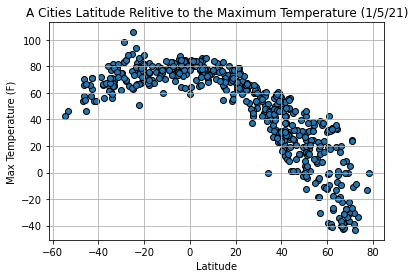

In [28]:

x=clean_df["Lat"]
y=clean_df['Max Temp']
# x_ticks = np.arange(-65, 85, 20)
plt.scatter(x,y,edgecolors='k')
plt.title('A Cities Latitude Relitive to the Maximum Temperature (1/5/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('lat_max.png')
plt.show()


#### The above figure indicates that cities located be the Tropic of Cancer and Capricorn tend to have the highest daily temperatures.

## Latitude vs. Humidity Plot

In [29]:
clean_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kalmunai,7.42,81.82,78.40,85,36,8.57,LK,1611975828
1,Rikitea,-23.12,-134.97,80.46,70,38,9.26,PF,1611975828
2,Santa Maria,-29.68,-53.81,75.20,83,0,9.22,BR,1611975567
3,Butembo,0.15,29.28,59.54,69,12,2.66,CD,1611975829
4,Cidreira,-30.18,-50.21,75.16,89,39,4.92,BR,1611975829


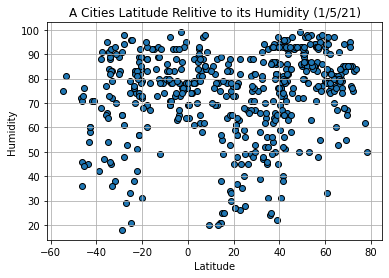

In [30]:
x=clean_df["Lat"]
y=clean_df['Humidity']
# x_ticks = np.arange(-65, 85, 20)
plt.scatter(x,y,edgecolors='k')
plt.title('A Cities Latitude Relitive to its Humidity (1/5/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('lat_hum.png')
plt.show()


#### This figure illustrates that cities located between 40 and 80 degrees latitude have the largest concentration of humidity levels above 60%.
#### While the humitity levels between 0 to 20 degrees have the greatest range of humidity.

## Latitude vs. Cloudiness Plot

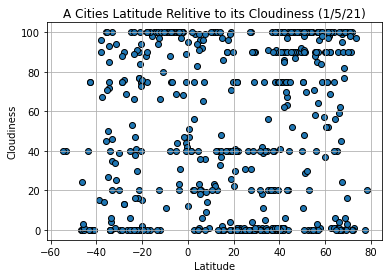

In [31]:
x=clean_df["Lat"]
y=clean_df['Cloudiness']
# x_ticks = np.arange(-65, 85, 20)
plt.scatter(x,y,edgecolors='k')
plt.title('A Cities Latitude Relitive to its Cloudiness (1/5/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('lat_cloud.png')
plt.show()


#### The figure represents cloud cover and how evenly dispersed it is over our planet

## Latitude vs. Wind Speed Plot

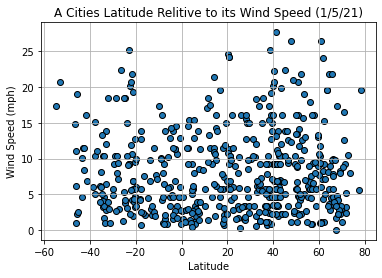

In [32]:
x=clean_df["Lat"]
y=clean_df['Wind Speed']
# x_ticks = np.arange(-65, 85, 20)
plt.scatter(x,y,edgecolors='k')
plt.title('A Cities Latitude Relitive to its Wind Speed (1/5/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('lat_wind.png')
plt.show()


#### As we can see from the figure above it is relitivly uncommon to have wind sppeds exceed 15 mph

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [33]:
n_hem_df= clean_df[clean_df['Lat']>=0]
# print(n_hem.head())#+test
n_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kalmunai,7.42,81.82,78.40,85,36,8.57,LK,1611975828
3,Butembo,0.15,29.28,59.54,69,12,2.66,CD,1611975829
6,Phek,25.67,94.50,52.48,67,0,0.31,IN,1611975830
7,Sladkovo,55.53,70.34,8.38,94,58,6.87,RU,1611975830
9,Nemuro,43.32,145.57,30.20,86,75,6.91,JP,1611975757


The r-squared is: 0.7724469466868791


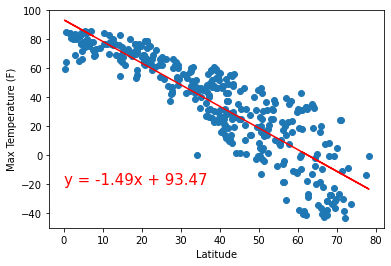

In [40]:
x=n_hem_df["Lat"]
y=n_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,reg,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")#not printing
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('n_hem_lat_max.png')
plt.show()

# reg = sp.stats.linregress(x, y)
# plt.scatter(x,y)
# line_eq = "y = " + str(round(reg.slope,2)) + "x + " + str(round(reg.intercept,2))
# plt.plot(x, res.intercept + reg.slope*x, 'r', label='fitted line')
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')

# plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [41]:
s_hem_df= clean_df[clean_df['Lat']<=0]
s_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Rikitea,-23.12,-134.97,80.46,70,38,9.26,PF,1611975828
2,Santa Maria,-29.68,-53.81,75.20,83,0,9.22,BR,1611975567
4,Cidreira,-30.18,-50.21,75.16,89,39,4.92,BR,1611975829
5,Hermanus,-34.42,19.23,61.00,91,72,3.29,ZA,1611975829
10,Busselton,-33.65,115.33,82.00,45,0,4.00,AU,1611975627


The r-squared is: 0.2801354387756524


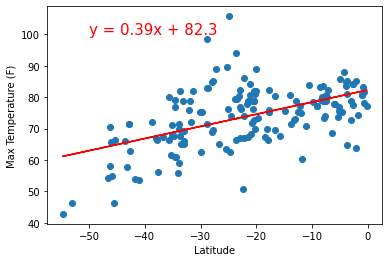

In [43]:
x=s_hem_df["Lat"]
y=s_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,reg,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")#not printing
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('s_hem_lat_max.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07088722453725388


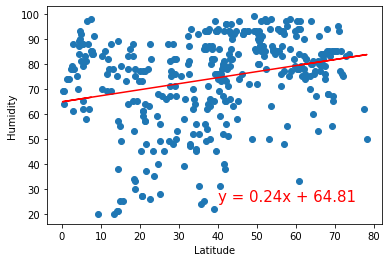

In [45]:
x=n_hem_df["Lat"]
y=n_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,reg,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")#not printing
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('n_hem_lat_hum.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07975735206623748


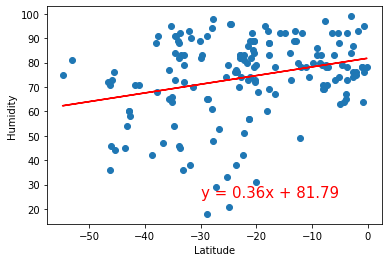

In [48]:
x=s_hem_df["Lat"]
y=s_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,reg,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")#not printing
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('s_hem_lat_hum.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04790761547408891


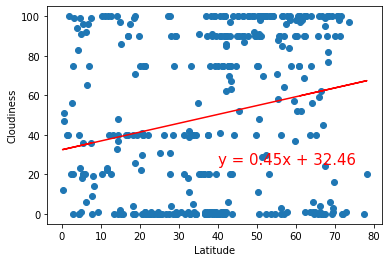

In [50]:
x=n_hem_df["Lat"]
y=n_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,reg,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")#not printing
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('n_hem_lat_cloud.png')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19181058618216545


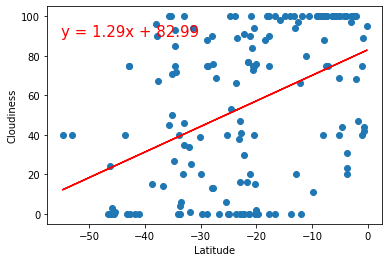

In [53]:
x=s_hem_df["Lat"]
y=s_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,reg,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")#not printing
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('s_hem_lat_cloud.png')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002614701835993414


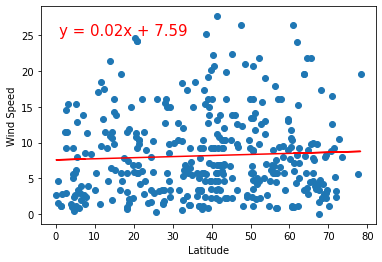

In [56]:
x=n_hem_df["Lat"]
y=n_hem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,reg,"r-")
plt.annotate(line_eq,(1,25),fontsize=15,color="red")#not printing
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('n_hem_lat_wind.png')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027303734848337504


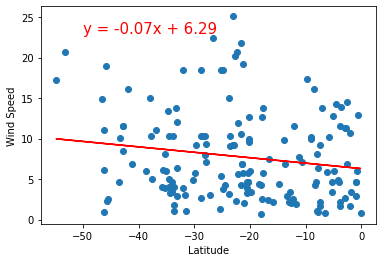

In [59]:
x=s_hem_df["Lat"]
y=s_hem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,reg,"r-")
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")#not printing
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('s_hem_lat_wind.png')
plt.show()
